In [1]:
# Importons les librairies dont nous avons besoin.

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

# Nettoyage
## Exploration globale

Commençons par charger le jeu de données en utilisant la première ligne comme en-tête de nos colonnes.
Le csv contenant beaucoup de lignes, travaillons dans un premier temps sur un échantillon de 10 000 lignes uniquement et regardons globalement ce qu'il contient.

In [2]:
n = 320807
s = 10000
skip = sorted(random.sample(range(1, n),n-s))

data = pd.read_csv("fr.openfoodfacts.org.products.csv", skiprows=skip, low_memory=False, sep="\t", header=0)

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 12.4+ MB


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000032070,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055720,2017-03-09T10:35:20Z,1489055720,2017-03-09T10:35:20Z,Organic Mixed Vegetable Spirals,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000034432,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055678,2017-03-09T10:34:38Z,1489055678,2017-03-09T10:34:38Z,"Foods, Honey Roasted Nut Mix",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
2,0000000038652,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Oat Bran,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000038744,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055719,2017-03-09T10:35:19Z,1489055719,2017-03-09T10:35:19Z,Organic Spelt Berries,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000058780,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055721,2017-03-09T10:35:21Z,1489055721,2017-03-09T10:35:21Z,Almonds,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le dataset comprend de nombreuses colonnes (162) qu'il ne sera peut être pas nécessaire de garder intégralement. On peut tout de suite remarquer la présence de beaucoup de valeurs NaN. Essayons donc d'afficher le remplissage par colonne pour voir si cela nous permet d'en éliminer.

## Nettoyages des colonnes
Commençons dans un premier temps par nous occuper des colonnes avant de travailler ensuite sur les lignes.

### Valeurs manquantes

In [10]:
data.notnull().mean() * 100

code                                 99.979998
url                                  99.989999
creator                             100.000000
created_t                           100.000000
created_datetime                    100.000000
last_modified_t                     100.000000
last_modified_datetime              100.000000
product_name                         94.469447
generic_name                         16.821682
quantity                             33.063306
packaging                            25.102510
packaging_tags                       25.102510
brands                               90.889089
brands_tags                          90.899090
categories                           26.812681
categories_tags                      26.812681
categories_fr                        26.822682
origins                               6.960696
origins_tags                          6.960696
manufacturing_places                 11.551155
manufacturing_places_tags            11.541154
labels       

On remarque que de nombreuses colonnes sont essentiellement remplies de NaN, il nous vaut mieux les supprimer. Afin d'avoir une meilleure vision, affichons cela sous forme de graphe en fixant un seuil de 60% par exemple.

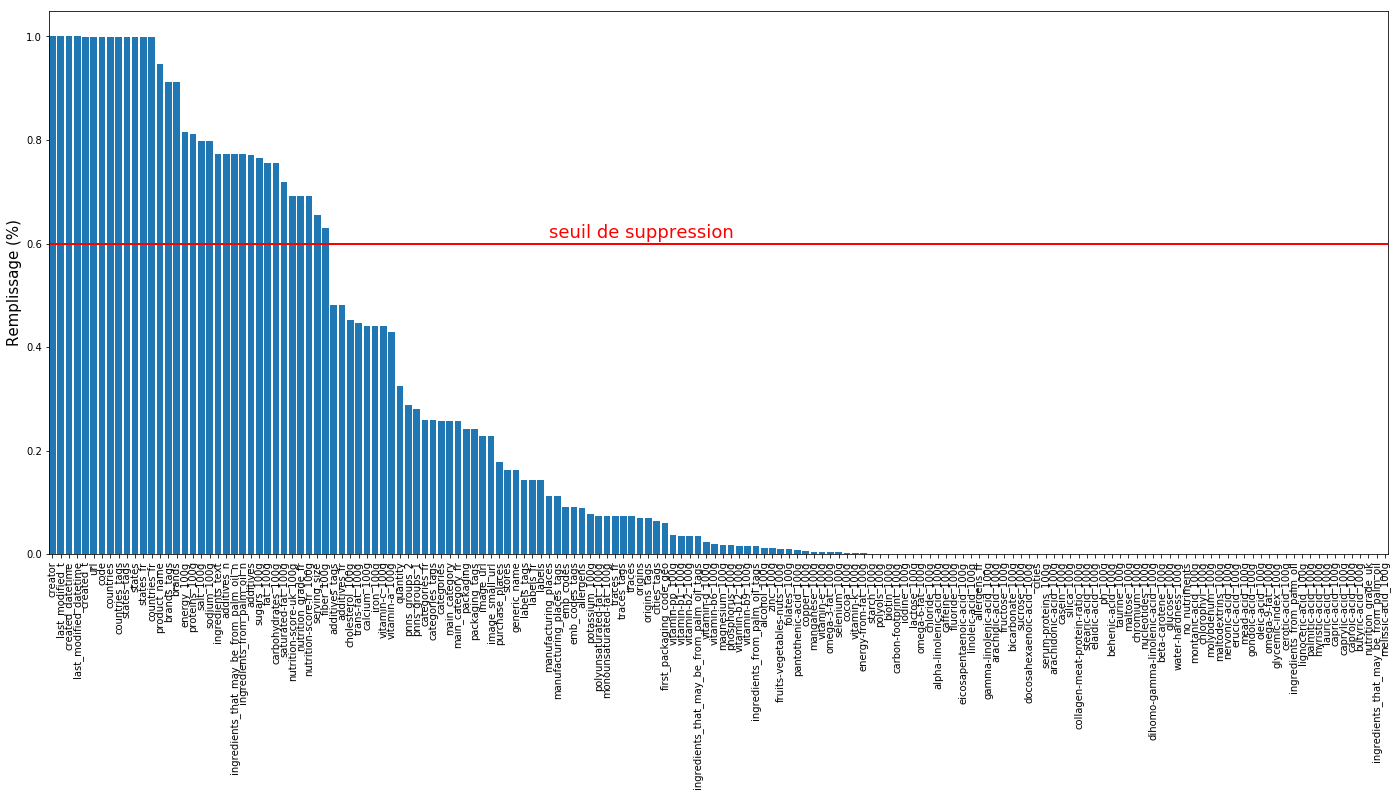

In [5]:
filling_factor = pd.DataFrame(data.notnull().mean().sort_values(ascending=False)).T
x = filling_factor.columns
y = filling_factor.values[0]
fig = plt.figure(figsize=(24, 10))
plt.xticks(rotation=90)
plt.bar(range(len(x)),y) # A bar chart
plt.xticks(range(len(x)), x)
plt.ylabel('Remplissage (%)', fontsize = 15)
plt.axhline(y=0.6, linewidth=2, color = 'r')
plt.text(60, 0.61, 'seuil de suppression', fontsize = 18, color = 'r')
plt.margins(x=0)

Conservons ce seuil de remplissage et supprimons toutes les colonnes dont le remplissage est inférieur à ce seuil.

In [6]:
data = data[data.columns[data.notnull().mean() >= 0.6]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 34 columns):
code                                       9995 non-null object
url                                        9997 non-null object
creator                                    9998 non-null object
created_t                                  9997 non-null object
created_datetime                           9998 non-null object
last_modified_t                            9998 non-null object
last_modified_datetime                     9998 non-null object
product_name                               9474 non-null object
brands                                     9117 non-null object
brands_tags                                9118 non-null object
countries                                  9994 non-null object
countries_tags                             9994 non-null object
countries_fr                               9994 non-null object
ingredients_text                           7721 non-null obje

Nous n'avons désormais plus que 34 colonnes.

### Valeurs non pertinentes
On peut également supprimer certaines colonnes qui ne nous seront pas utiles dans notre analyse, comme l'url 
d'un produit, sa date de création...

In [7]:
data = data.loc[:, "product_name":]
data.head()

,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Organic Quinoa Coconut Granola With Mango,Sunridge,sunridge,US,en:united-states,États-Unis,"Organic rolled oats, organic evaporated cane j...",55 g (0.5 cup),0.0,[ organic-rolled-oats -> en:organic-rolled-oa...,...,10.91,2.73,69.09,27.27,9.1,10.91,0.02286,0.009,7.0,7.0
1,Roasted Salted Black Pepper Cashews,Sunridge,sunridge,US,en:united-states,États-Unis,"Whole cashews, sunflower oil, salt, black pepper",30 g (30 g),0.0,[ whole-cashews -> en:whole-cashews ] [ cas...,...,46.67,8.33,30.00,6.67,3.3,16.67,1.01600,0.400,16.0,16.0
2,Roasted Salted Sunflower Seeds,Kid Picks,kid-picks,US,en:united-states,États-Unis,"Sunflower kernels, coconut oil, salt",28 g (0.25 cup),0.0,[ sunflower-kernels -> en:sunflower-kernels ...,...,57.14,7.14,21.43,3.57,17.9,21.43,1.08966,0.429,14.0,14.0
3,Organic Kamut Flakes,Unfi,unfi,US,en:united-states,États-Unis,Organic kamut flakes,40 g (0.25 cup),0.0,[ organic-kamut-flakes -> en:organic-kamut-fl...,...,1.25,NaN,42.50,NaN,5.0,10.00,NaN,NaN,NaN,NaN
4,Organic Pearled Barley,Unfi,unfi,US,en:united-states,États-Unis,Organic pearled barley.,50 g (0.25 cup),0.0,[ organic-pearled-barley -> en:organic-pearle...,...,2.00,NaN,78.00,NaN,16.0,10.00,0.02032,0.008,NaN,NaN


### Valeurs redondantes
On peut tout de suite remarquer que les mêmes valeurs sont présentes dans différentes colonnes comme par exemple le countries, le countries_tags et le countries_fr. Il n'est donc pas utile de toutes les garder.

In [8]:
data = data.drop(data.loc[:,['brands', "countries", 'countries_tags']].columns, axis=1).drop(data.loc[:,'states':'states_fr'].columns, axis=1).drop(columns="ingredients_that_may_be_from_palm_oil_n", axis=1)

Supprimons également la colonne additive pour ne garder que additives_n dont l'exploitation sera plus facile.

In [9]:
data = data.drop(columns=["additives"], axis=1)
data.head()

,product_name,brands_tags,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Organic Quinoa Coconut Granola With Mango,sunridge,États-Unis,"Organic rolled oats, organic evaporated cane j...",55 g (0.5 cup),0.0,0.0,c,1674.0,10.91,2.73,69.09,27.27,9.1,10.91,0.02286,0.009,7.0,7.0
1,Roasted Salted Black Pepper Cashews,sunridge,États-Unis,"Whole cashews, sunflower oil, salt, black pepper",30 g (30 g),0.0,0.0,d,2372.0,46.67,8.33,30.00,6.67,3.3,16.67,1.01600,0.400,16.0,16.0
2,Roasted Salted Sunflower Seeds,kid-picks,États-Unis,"Sunflower kernels, coconut oil, salt",28 g (0.25 cup),0.0,0.0,d,2766.0,57.14,7.14,21.43,3.57,17.9,21.43,1.08966,0.429,14.0,14.0
3,Organic Kamut Flakes,unfi,États-Unis,Organic kamut flakes,40 g (0.25 cup),0.0,0.0,NaN,941.0,1.25,NaN,42.50,NaN,5.0,10.00,NaN,NaN,NaN,NaN
4,Organic Pearled Barley,unfi,États-Unis,Organic pearled barley.,50 g (0.25 cup),0.0,0.0,NaN,1506.0,2.00,NaN,78.00,NaN,16.0,10.00,0.02032,0.008,NaN,NaN


### Valeurs mal formatées

Etudions le format de la colonne ingredients_text.

In [10]:
data["ingredients_text"].dropna()

0       Organic rolled oats, organic evaporated cane j...
1        Whole cashews, sunflower oil, salt, black pepper
2                    Sunflower kernels, coconut oil, salt
3                                    Organic kamut flakes
4                                 Organic pearled barley.
5       Enriched wheat flour (wheat flour niacin, redu...
6       Unbleached wheat flour, vegetable fat non hydr...
7       Enriched wheatflour (wheatflour, malted barley...
8                                            Shave grass.
9       Farine de _blé_, _œufs_ frais, huile de colza,...
10      Semi-sweet chocolate (sugar, chocolate process...
11      Whole peeled, cored gravenstein apples and wel...
12      Sugar, whole milk powder, cocoa butter, cocoa ...
14      Apricots, sulfur dioxide as a preservative to ...
16      Filtered water, oats*, oat bran*, tricalcium p...
17      Durum wheat semolina, niacin, iron ferrous lac...
18      Milk chocolate (sugar, cocoa butter, milk, cho...
19      Cucumb

Le fait que le dataset soit open source mène à une grande diversité (français, anglais, virgules, casse...). Pour cela, décidons de supprimer cette colonne.

In [11]:
data = data.drop(columns=["ingredients_text"], axis=1)

De la même façon la colonne serving-size mélange différents formats, différentes unités, et celle-ci ne constitue pas
une information essentielle dans la volonté de créer des recettes saines. Décidons donc de supprimer cette colonne.

In [12]:
data = data.drop(columns=["serving_size"], axis=1)

### Cas particuliers

On remarque que les deux dernières colonnes semblent similaires. Regardons plus en détails ce qu'il en est.

In [13]:
len(data.loc[(data["nutrition-score-fr_100g"] != data["nutrition-score-uk_100g"]) & (~np.isnan(data["nutrition-score-uk_100g"]))]) / 100

2.47

Le score de nutrition fr et uk ne différent que pour 2% des valeurs non NaN. Notre travail étant à destination d'une entreprise française nous n'allons garder que le score français.

In [14]:
data = data.drop(columns=["nutrition-score-uk_100g"], axis=1)

Le site de notre client étant destiné à des consommateurs français regardons dans quels pays sont vendus les produits.

In [15]:
data["countries_fr"].head()

0    États-Unis
1    États-Unis
2    États-Unis
3    États-Unis
4    États-Unis
Name: countries_fr, dtype: object

On remarque que certains d'entre-eux ne sont pas vendus en France. Gardons en mémoire que pour la constitution finale du dataset nous ne garderons que les produits vendus en France.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 16 columns):
product_name                   9474 non-null object
brands_tags                    9118 non-null object
countries_fr                   9994 non-null object
additives_n                    7719 non-null float64
ingredients_from_palm_oil_n    7719 non-null float64
nutrition_grade_fr             6920 non-null object
energy_100g                    8152 non-null float64
fat_100g                       7563 non-null float64
saturated-fat_100g             7186 non-null float64
carbohydrates_100g             7556 non-null float64
sugars_100g                    7656 non-null float64
fiber_100g                     6293 non-null float64
proteins_100g                  8118 non-null float64
salt_100g                      7974 non-null float64
sodium_100g                    7974 non-null float64
nutrition-score-fr_100g        6920 non-null float64
dtypes: float64(12), object(4)
memory usage: 1.2+

Nous avons largement diminué le nombre de colonnes de notre dataset pour nous concentrer sur les plus pertinentes pour notre analyse. Chargeons de nouveau le dataset sur cette base de colonnes et nettoyons cette fois les lignes.

In [17]:
df = pd.read_csv("fr.openfoodfacts.org.products.csv",
        header=0,
        usecols=data.columns,
        error_bad_lines=False, 
        sep="\t", 
        warn_bad_lines=False)

## Nettoyage des lignes

### Product name
Supprimons toutes les lignes dont la colonne "product_name" n'est pas renseignée. Nous n'avons aucun intérêt à garder un produit dont on ne connait pas le nom.

In [18]:
df = df[df["product_name"].notnull()]

### Countries_fr
Supprimons toutes les produit dont les pays de vente ne sont pas indiqués ou n'incluent pas la France.

In [19]:
df = df[df['countries_fr'].notnull()]
df = df[df['countries_fr'].str.contains("France")]

# Supprimons la colonne countries_fr dont nous n'avons plus besoin maintenant qu'elle nous a permis de filtrer les 
# pays.

df = df.drop(columns=["countries_fr"], axis=1)

### Nutritions
Gardons uniquement les lignes dont au moins 3 colonnes nutritives sont renseignées.

In [20]:
df = df[df.loc[: ,"energy_100g":"sodium_100g"].apply(lambda x: x.count(), axis=1) >= 3]

### Doublons
Conservons uniquement les ingrédients dont la paire "product_name"-"brands_tags" est unique.

In [21]:
df = df.drop_duplicates(subset=['product_name', 'brands_tags'])
df.head()

,product_name,brands_tags,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
106,Lion Peanut x2,sunridge,1.0,0.0,e,1883.0,20.00,12.5,70.00,57.5,2.5,2.50,0.09652,0.038000,22.0
138,Pack de 2 Twix,"twix,lundberg",NaN,NaN,NaN,1481.0,4.17,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN
190,Mini Confettis,alice-delice,NaN,NaN,d,1753.0,NaN,0.8,NaN,87.7,0.9,0.60,0.01000,0.003937,14.0
191,Praliné Amande Et Noisette,alice-delice,NaN,NaN,d,2406.0,NaN,2.9,NaN,50.3,3.9,9.50,0.00300,0.001181,14.0
226,"Pepsi, Nouveau goût !",pepsi,2.0,0.0,e,177.0,0.00,0.0,10.40,10.4,0.0,0.00,0.02540,0.010000,13.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61741 entries, 106 to 320763
Data columns (total 15 columns):
product_name                   61741 non-null object
brands_tags                    61485 non-null object
additives_n                    41884 non-null float64
ingredients_from_palm_oil_n    41884 non-null float64
nutrition_grade_fr             58674 non-null object
energy_100g                    61673 non-null float64
fat_100g                       44928 non-null float64
saturated-fat_100g             59660 non-null float64
carbohydrates_100g             44878 non-null float64
sugars_100g                    59724 non-null float64
fiber_100g                     43919 non-null float64
proteins_100g                  61523 non-null float64
salt_100g                      59761 non-null float64
sodium_100g                    59760 non-null float64
nutrition-score-fr_100g        58674 non-null float64
dtypes: float64(12), object(3)
memory usage: 7.5+ MB


Le nombre de ligne est désormais de 61 998 pour 15 colonnes.

### Outliers

Essayons de visualiser les outliers pour les colonnes à valeurs nutritives. Considérons toutes les valeurs supérieures au troisème quartile plus 1,5 fois l'écart entre le troisième et le premier quartiles comme étant des outliers.

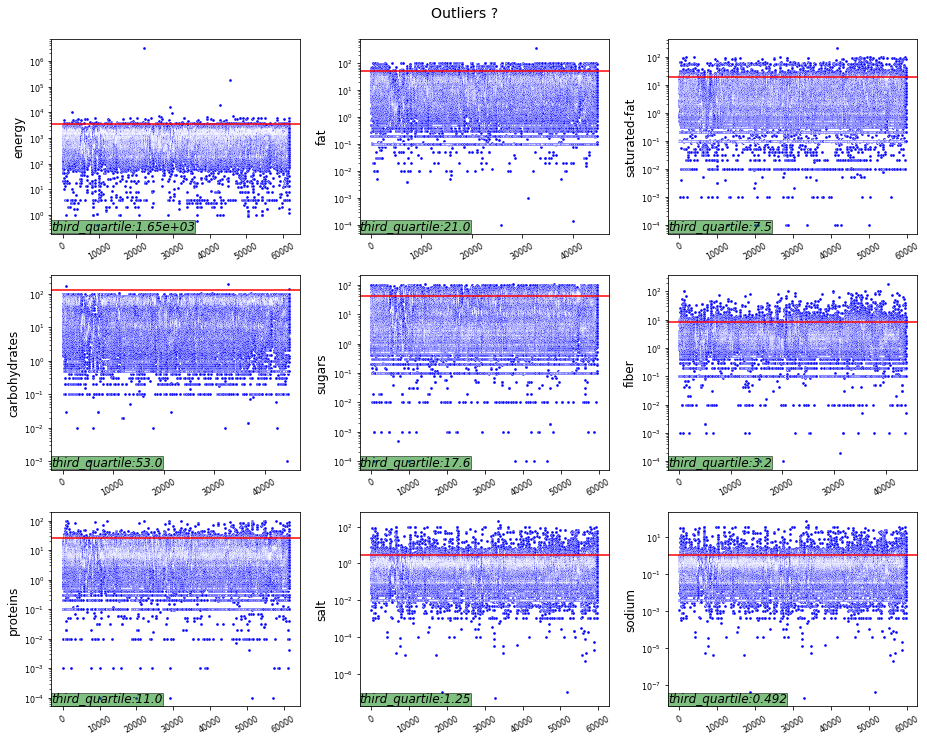

In [23]:
quantite = [col for col in df.columns if '100g' in col][:-1]
third = [0 for _ in range(9)]
first = [0 for _ in range(9)]
for i in range(len(quantite)):
    colonne = quantite[i]
    first[i], third[i] = df[pd.notnull(df[colonne])][colonne].quantile([0.25, 0.75])
        
tPlot, axes = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize=(13,10))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    colonne = quantite[i]
    test = df[pd.notnull(df[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=8)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 12)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=third[i] + 1.5*(third[i] - first[i]), color='r', linestyle='-')
    ax.text(0., 0.02, 'third_quartile:{:.3}'.format(third[i]),
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'green', 'alpha':0.5, 'pad':0})
    i += 1

tPlot.text(0.5, 1.01, "Outliers ?", ha='center', fontsize = 14)
plt.tight_layout()

Cette étude nous permet directement de voir que certaines valeurs sont impossibles (sucre supérieur à 100 grammes par
exemple). Afin de ne pas supprimer trop de données considérons simplement que les valeurs en dessous de 0 gramme ou au dessus de 100 grammes pour 100 grammes sont forcément erronées.

In [24]:
for colonne in quantite[1:9]:
    df = df[(np.isnan(df[colonne])) | ((df[colonne] <= 100) & (df[colonne] >= 0))]

### Cas particuliers

Supprimons les lignes dont la somme des nutriments est supérieure à 100 grammes.

In [25]:
df["sum"] = df.fat_100g.fillna(0) + df.carbohydrates_100g.fillna(0) + df.fiber_100g.fillna(0) + df.proteins_100g.fillna(0) + df.salt_100g.fillna(0)
df = df[df["sum"] <= 100]
df = df.drop(columns="sum", axis=1)

Supprimons les lignes dont une valeur "enfant" est plus grande qu'une valeur "parent".

In [26]:
pairs = [["saturated-fat_100g", "fat_100g"], ["sugars_100g", "carbohydrates_100g"], ["sodium_100g", "salt_100g"]]

for pair in pairs:
    df = df[(df[pair[0]] <= df[pair[1]]) | (np.isnan(df[pair[0]])) | (np.isnan(df[pair[1]]))]

Convertissons l'énergie de kjoule en kcal.

In [27]:
df["energy_100g"] = df["energy_100g"] * 0.24

Supprimons les lignes dont l'énergie est supérieure à 3000 cal ce qui correspond à la quantité ingérée par un sportif de haut niveau sur une journée.

In [28]:
df = df[df["energy_100g"] < 3000]

Bien qu'il reste des NaN dans notre dataset, prenons le partie de les garder plutôt que de les remplacer par des valeurs choisies. Nous éviterons ainsi d'accepter par erreur des produits toxiques ou au contraire d'éliminer des produits sains. Toutefois une prédiction des valeurs manquantes par KNN ou à l'aide d'un random forest auraient pu être également envisageables.

## Création du nouveau CSV
Créons un nouveau csv à partir de ce nettoyage qui constituera notre base de données cleanées.

In [29]:
df.to_csv("clean_data.csv", columns=df.columns, encoding="utf-8", index=False)

Vérifions que cela a bien fonctionné en extrayant le nouveau dataset.

In [30]:
clean_data = pd.read_csv("clean_data.csv", error_bad_lines=False, warn_bad_lines=False, header=0)

In [31]:
clean_data.tail()

,product_name,brands_tags,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
61035,Verrine Cheescake Myrtille,kayser,NaN,NaN,d,260.16,NaN,12.00,NaN,10.50,0.0,8.70,0.2900,0.114173,16.0
61036,Fiche Brevet,hatier,NaN,NaN,b,0.96,NaN,1.00,NaN,1.00,10.0,10.00,10.0000,3.937008,0.0
61037,Tartines craquantes bio au sarrasin,le-pain-des-fleurs,NaN,NaN,a,394.32,2.8,0.60,74.8,2.60,5.9,13.00,0.6800,0.267717,-4.0
61038,Amandes,biosic,NaN,NaN,b,577.44,NaN,3.73,NaN,3.89,12.2,21.22,0.1000,0.039370,0.0
61039,Thé vert Earl grey,lobodis,0.0,0.0,c,5.04,0.2,0.20,0.5,0.50,0.2,0.50,0.0254,0.010000,2.0


Il nous reste plus de 60 000 lignes à explorer. On peut voir que le dataset semble désormais bien plus exploitable
qu'il ne l'était au début. Le nettoyage est ici terminé.